In [1]:
import json

data_path = "evolution_with_rockets_scores.json"

In [8]:
MAX_SIZE = 750
with open(data_path, "r") as f:
    data = json.load(f)[:MAX_SIZE]

In [9]:
print(f"Amount of scores in data: {len(data)}")

Amount of scores in data: 750


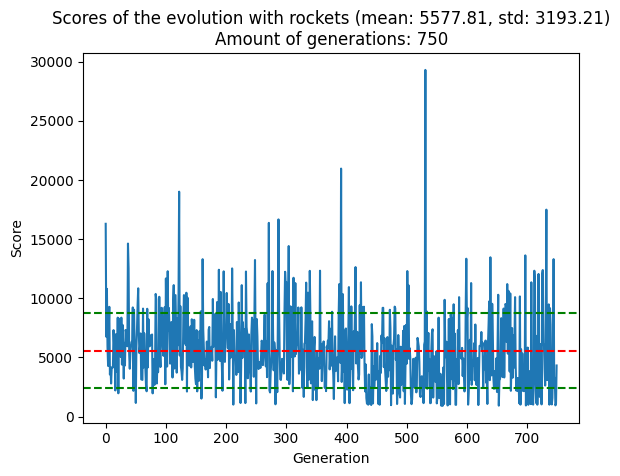

In [12]:
# add graph with statistics
import matplotlib.pyplot as plt
import numpy as np


def plot_scores(data):
    scores = [score for score in data]

    plt.plot(scores)
    mean = np.mean(scores)
    std = np.std(scores)
    plt.axhline(y=mean, color="r", linestyle="--")
    plt.axhline(y=mean + std, color="g", linestyle="--")
    plt.axhline(y=mean - std, color="g", linestyle="--")

    plt.title(f"Scores of the evolution with rockets (mean: {mean:.2f}, std: {std:.2f})\nAmount of generations: {len(scores)}")
    plt.xlabel("Generation")
    plt.ylabel("Score")
    plt.show()


plot_scores(data)
